# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



### Business Goal:


You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike sharing dataset

In [110]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [109]:
import numpy as np
import pandas as pd

In [153]:
# reading dataset
bike = pd.read_csv('day.csv')

In [156]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [155]:
# checking rows and colums
bike.shape

(730, 16)

In [127]:
#Datatypes of each column

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [157]:
# Rename the columns for clear understanding
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [158]:
#Mapping variable season

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

In [159]:
#Mapping variable month
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [160]:
#Mapping variable weathersit
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

In [161]:
#Mapping variable weekdays
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [162]:
bike.head(10)

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,Jan,0,Sat,0,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,Jan,0,Tue,1,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,Jan,0,Wed,1,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [163]:
# Describinh the varibale
bike.describe()

,instant,Year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [73]:
#Checking missing values
bike.isnull().sum()

Aug              0
Dec              0
Feb              0
Jan              0
July             0
June             0
Mar              0
May              0
Nov              0
Oct              0
Sep              0
Mon              0
Sat              0
Sun              0
Thu              0
Tue              0
Wed              0
Light Snow       0
Mist + Cloudy    0
spring           0
summer           0
winter           0
Year             0
holiday          0
workingday       0
temp             0
humidity         0
windspeed        0
count            0
dtype: int64

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's we can identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [164]:
# Importing the required libraries for plots.

import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns


### Identify Continuous and Categorical Features


In [165]:
bike.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

- If the number of unique values <=40: Categorical column
- If the number of unique values in a columns> 50: Continuous column

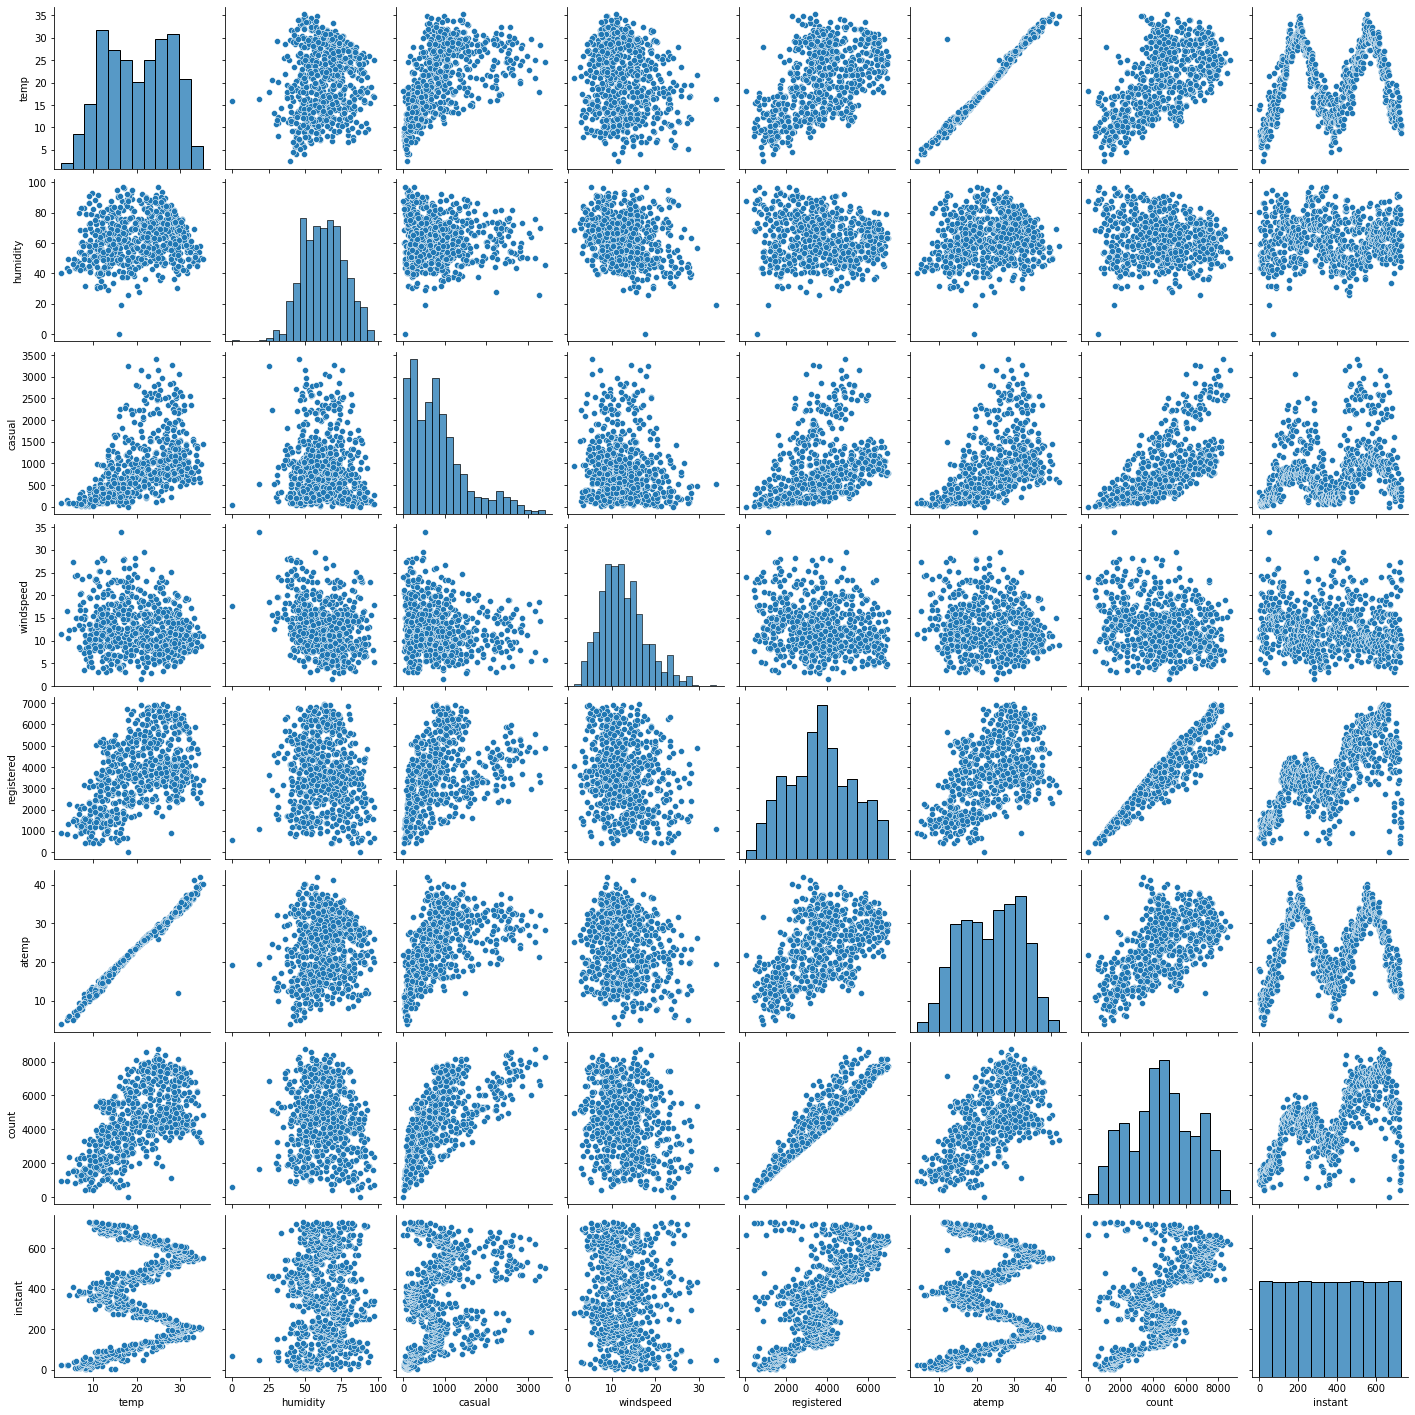

In [137]:
#Pairplot for numeric variables
sns.pairplot(bike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

#### Visualising Categorical Variables
As we might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

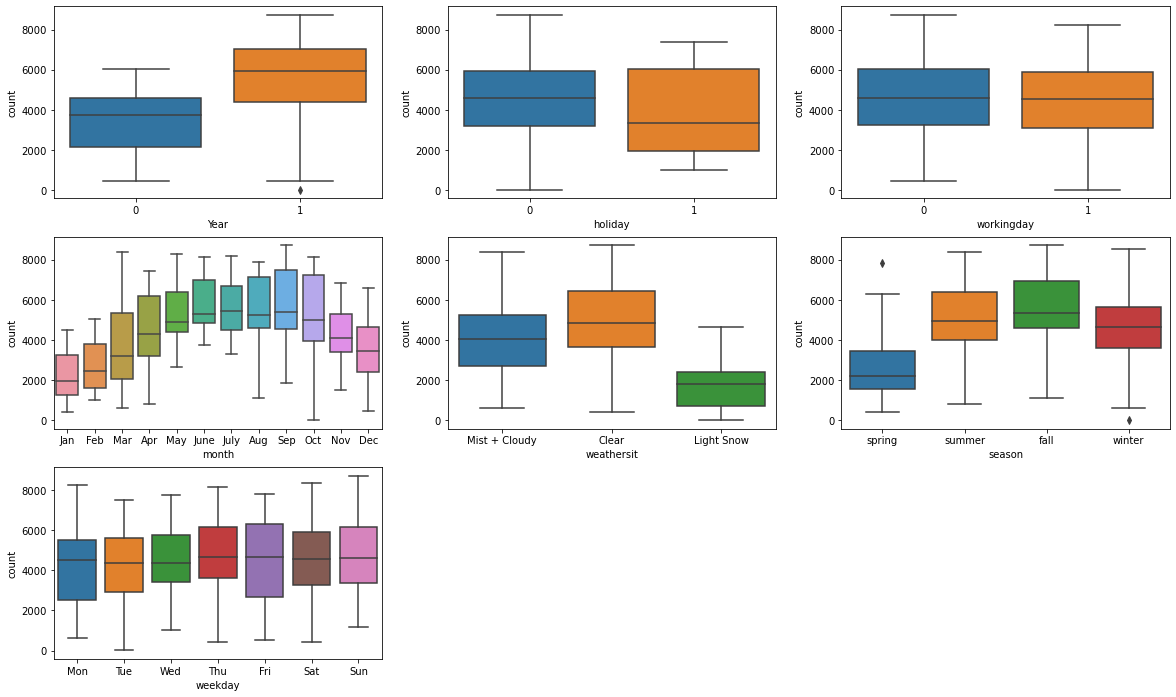

In [138]:
#Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.show()

#### Lets understand the variables in more better way



- ### Season

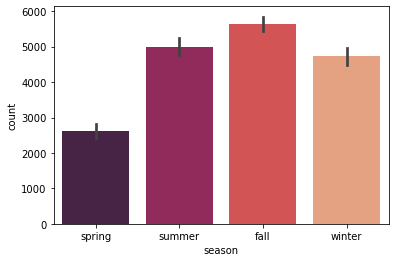

In [139]:
#Barplot to see relation between season and count of bike rentals
sns.barplot('season','count',data=bike,palette="rocket",)
plt.show()

##### Observed that Bike Rentals are more during the Fall season and then in summer.


- ### Weathersit

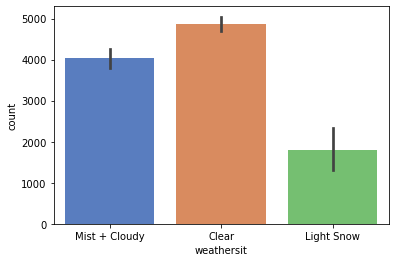

In [28]:
#Relation between weather and count of bike rentals
sns.barplot('weathersit','count',palette="muted",data=bike)
plt.show()

##### Find that bike Rentals are more in clear weathersit.


- ### Year

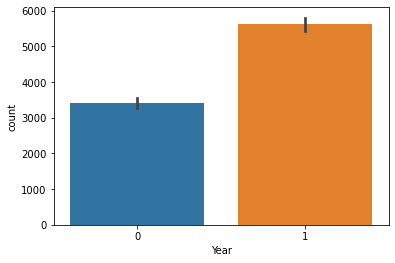

In [27]:
#year (0: 2018, 1:2019)

#Relation between Year and count of bike rentals
sns.barplot('Year','count',data=bike)
plt.show()

##### Bike Rentals are more in the year 2019 compare to 2018


- ### Month

year (0: 2018, 1:2019)


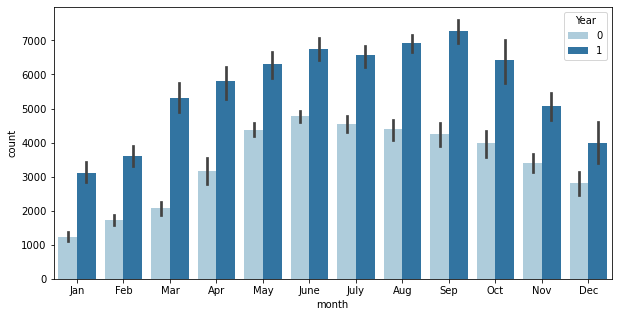

In [140]:
#Relation between month and count
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='Year',data=bike,palette='Paired')
plt.show()

##### Observed that in year 2019 sep, Aug, June, May months more bike rentals


- ### Temperature

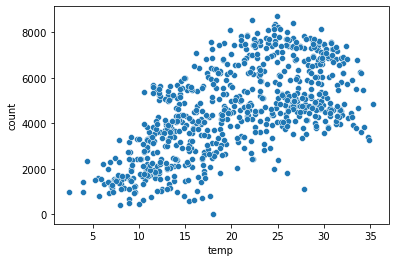

In [141]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=bike)
plt.show()

#### Bike Rentals are observed at higher temperatures


- ### Humidity

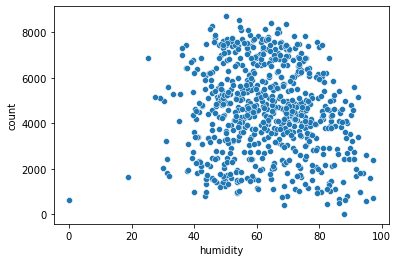

In [142]:
sns.scatterplot(x='humidity', y='count',data=bike)
plt.show()

#### Bike rental are more at high humidity

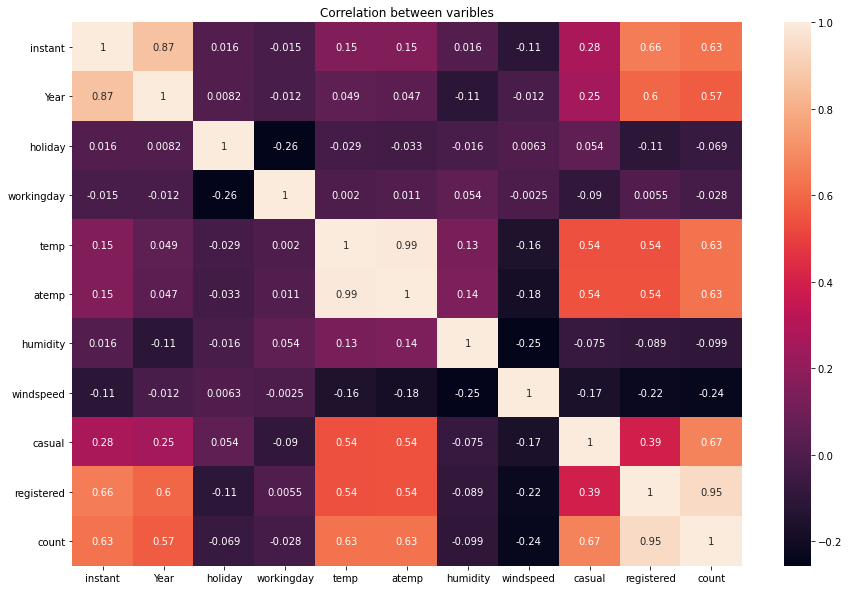

In [143]:
# Heat map to check correlation between variables
plt.figure(figsize=(15,10))
sns.heatmap(bike.corr(), cmap=None, annot= True)
plt.title("Correlation between varibles")
plt.show()

##### As it is visible from the pairplot and the heatmap, we can see temp, atemp, casual,registered,instant variables are correlated to 'count' variable

###### We can also see some other variables are also most correlated.
- Both the plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model
- So yes we can consider a Linear Regression Model.

#### Droping the unnecessary variables from the dataset


In [166]:
# Droping the variables: instant,dteday,casual,registered,atemp
bike=bike.drop(['instant','dteday','casual', 'registered'], axis=1)

In [167]:
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [168]:
#Checking datatypes of all the columns
bike.dtypes

season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
humidity      float64
windspeed     float64
count           int64
dtype: object

## Data Preparation

### Working on Dummy variables


In [169]:
 # Get the dummy variables for month, season, weathersit, weekday and Let's drop the first column from  using 'drop_first = True'pd.get_dummies(bike.season,drop_first=True)
months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)


In [170]:
# Add the results to the original bike dataframe
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [171]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [172]:
# checking shape
bike.shape

(730, 30)

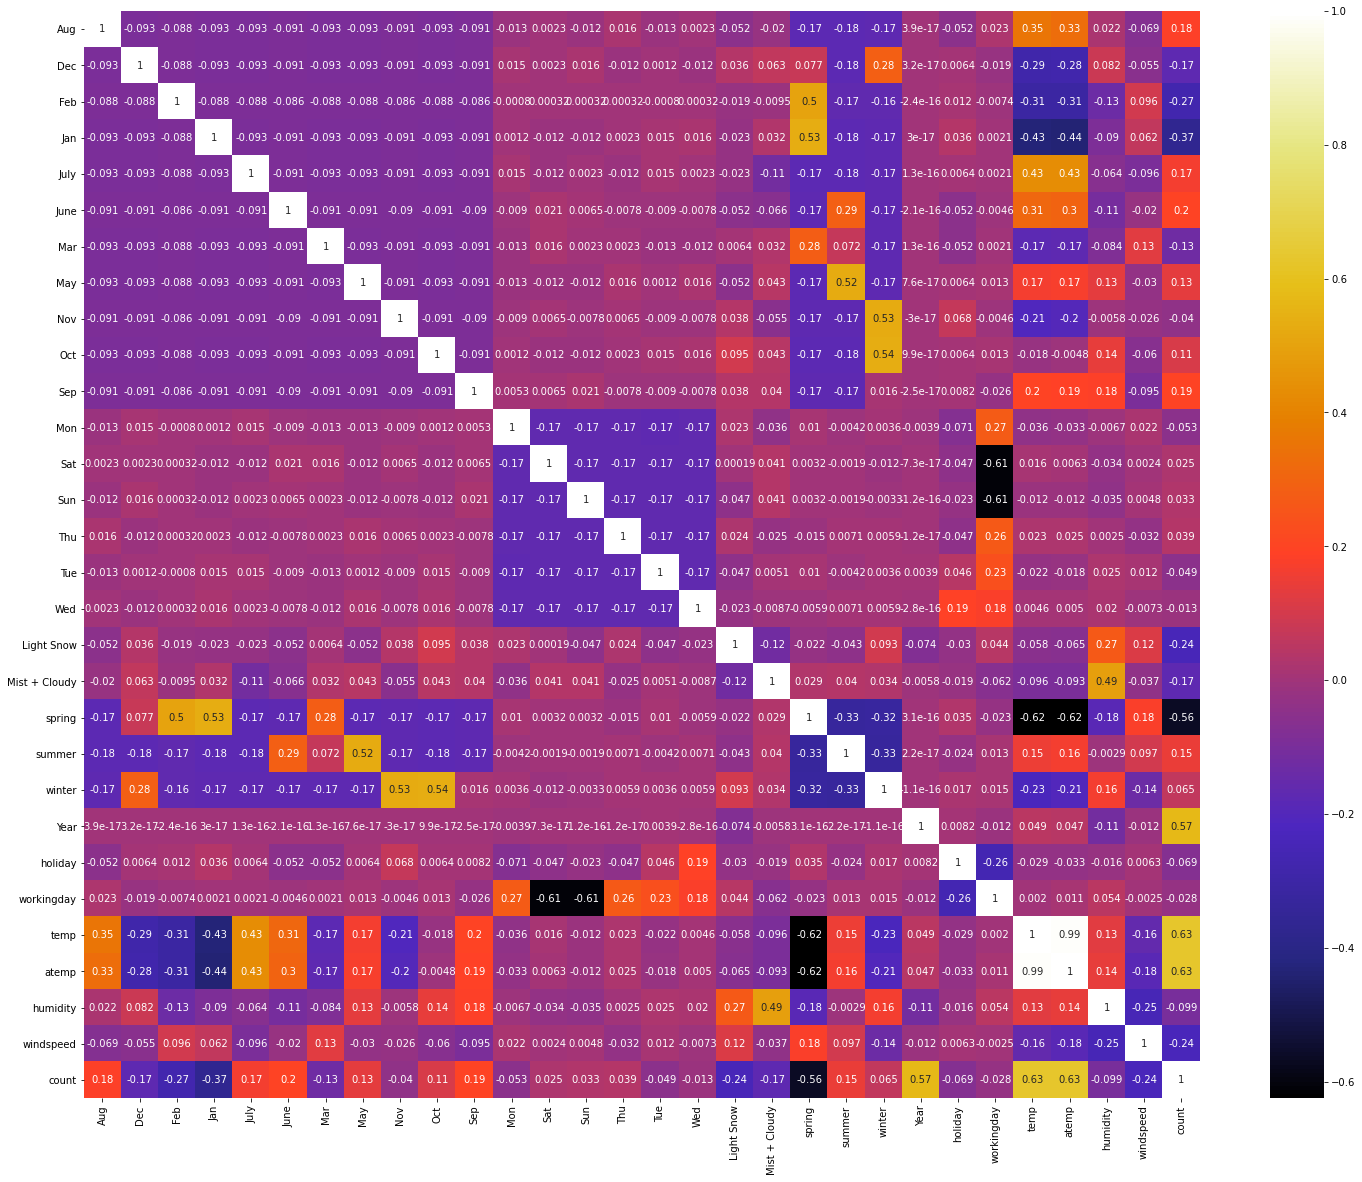

In [173]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='CMRmap', annot = True)
plt.show()

#### Observed that temperature,Summer season,June to october months are in good correlation with the 'count' variable. And seem to have good influence on the number of bike rentals

### Splitting the Data into Training and Testing Sets


Before model building, first need to perform the test-train split and scale the features.



In [174]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [175]:
#Rows and columns after split
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features 


It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

##### There are two common ways of rescaling:

- Min-Max scaling (Normalisation):Between 0 and 1

- Standardisation :mean-0, sigma-1

In [95]:
#Normalisation = (x-xmin)/(x max-x min)
#Standardisation= (x-mu)/ sigma

#### Using Min_Max scaling

In [176]:
# importing librey
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [177]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','atemp','count']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
653,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [178]:
#Checking numeric variables(min and max) after scaling
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.245098,0.24902,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.430568,0.43287,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


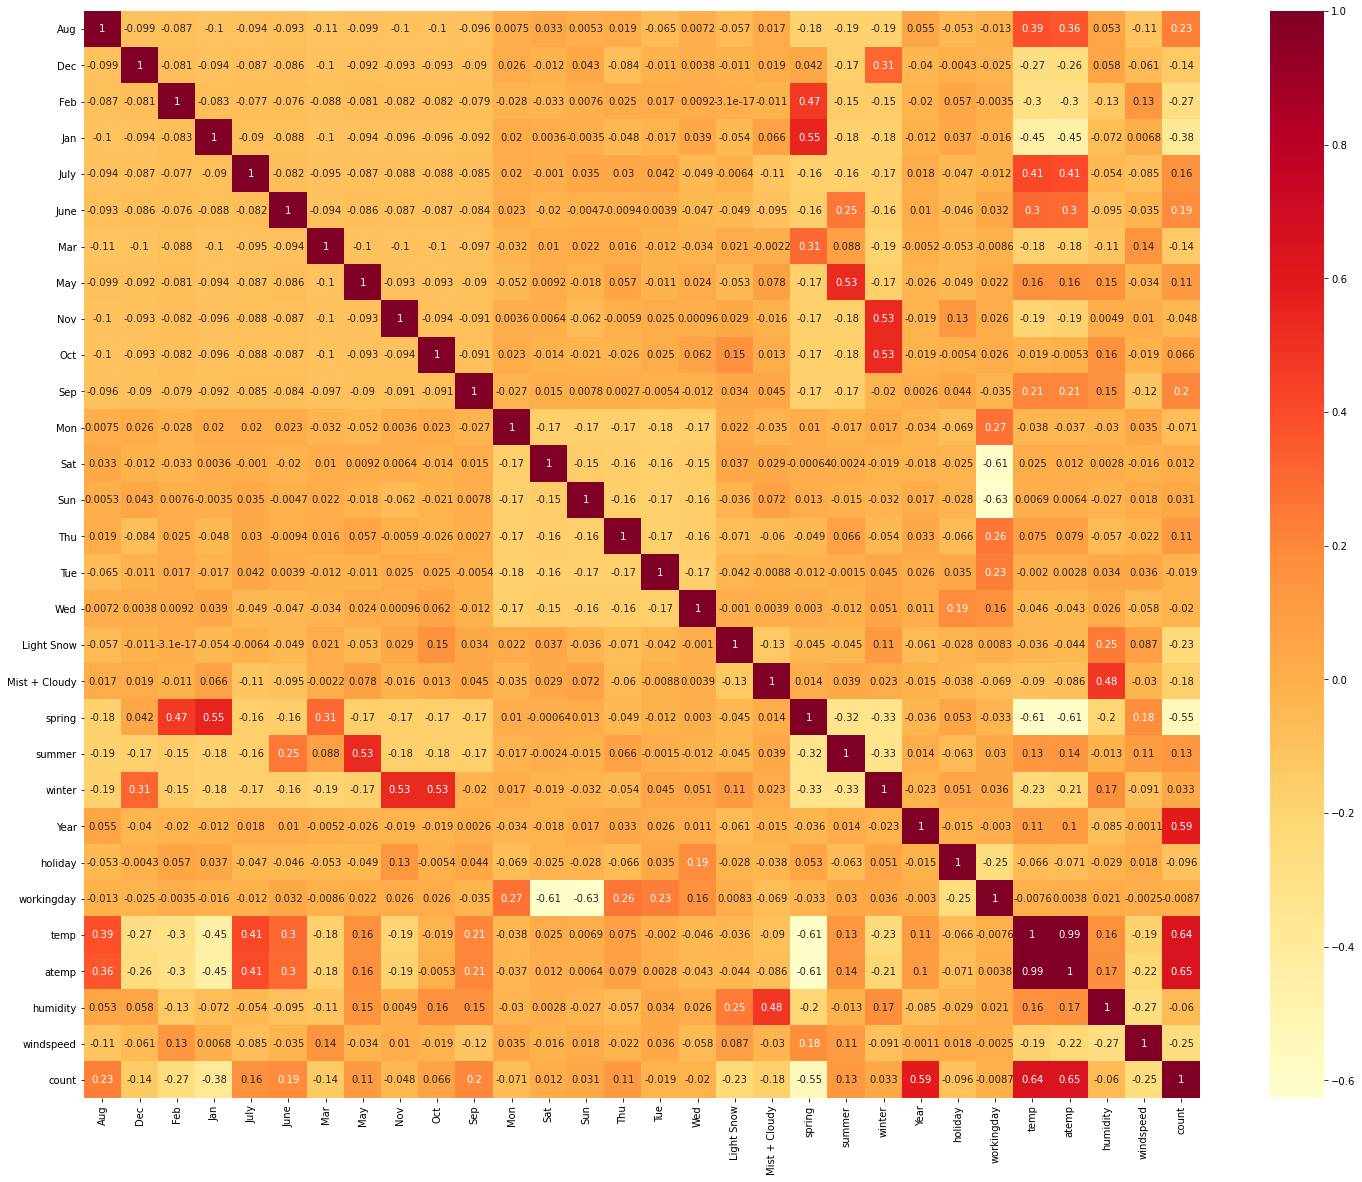

In [179]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors
# using heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

#### Observed that temp and year are correlated to the 'count' variable. Even in August, September months the counts are little high.

### Dividing into X and Y sets for the model building.


In [180]:
#Divide the data into X and y
y_train = bike_train.pop('count')
X_train = bike_train

In [181]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [182]:
X_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,atemp,humidity,windspeed
653,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0.509887,0.501133,0.575354,0.300794
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475


## Building a linear model


##### We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### Recursive Feature Elimination (RFE)



In [183]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [184]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [185]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [186]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'Year', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [187]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday', 'atemp'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics.


In [188]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [189]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [191]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [192]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.34e-189
Time:                        08:51:34   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886

### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.



In [193]:
#Drop the constant term 
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [194]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,30.94
12,temp,17.80
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.81
6,Mist + Cloudy,2.32
10,Year,2.09
3,Nov,1.83
1,Jan,1.75


#### 'humidity' variable can be dropped as its insignificant by looking at very high VIF value.



Rebuilding the model without 'humidity'


### Model 1

In [195]:
#Drop humidity
X_train_new1 = X_train_rfe.drop(["humidity"], axis = 1)

In [196]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.57e-186
Time:                        08:53:51   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2466      0.032      7.679

In [197]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [198]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,5.17
13,windspeed,4.67
9,winter,2.94
7,spring,2.89
8,summer,2.23
10,Year,2.07
3,Nov,1.80
1,Jan,1.66
2,July,1.59
6,Mist + Cloudy,1.56


#### Nov variable seems to be insignificant, by looking at p value is high as compare other variable, so we can drop it


### Model 2

In [199]:
#Drop Nov
X_train_new2 = X_train_lm1.drop(["Nov"], axis = 1)

In [200]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.20e-186
Time:                        08:56:22   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2288      0.031      7.334

In [201]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [202]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.14
12,windspeed,4.62
6,spring,2.89
7,summer,2.23
9,Year,2.07
8,winter,2.06
1,Jan,1.65
2,July,1.59
5,Mist + Cloudy,1.56
3,Sep,1.34


#### Dec variable seems to be insignificant, by looking at p value is high so we can drop it



Rebuliding the model without Dec


### Model 3

In [203]:
#Drop the Dec column
X_train_new3=X_train_lm2.drop(['Dec'],axis=1)

In [204]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.97e-187
Time:                        08:59:05   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2155      0.030      7.096

In [205]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [206]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.61
5,spring,2.75
6,summer,2.22
8,Year,2.07
7,winter,1.79
0,Jan,1.61
1,July,1.59
4,Mist + Cloudy,1.56
2,Sep,1.34


#### Jan column can be dropped due to its p value.



Rebuilding the model without Jan

### Model 4


In [207]:
#Drop the Jan column
X_train_new4=X_train_lm3.drop(['Jan'],axis=1)

In [208]:
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.40e-187
Time:                        09:01:20   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1996      0.030      6.758

In [209]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [210]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
5,summer,2.21
4,spring,2.08
7,Year,2.07
6,winter,1.79
0,July,1.58
3,Mist + Cloudy,1.55
1,Sep,1.34
2,Light Snow,1.08


#### July column can be dropped due to its p value


Rebuilding the model without July

### Model 5


In [211]:
# July
X_train_new5=X_train_lm4.drop(['July'], axis=1)

In [213]:
#Building a model
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          7.36e-187
Time:                        09:03:43   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1910      0.030      6.456

In [214]:
#Drop constant
X_train_lm5= X_train_lm5.drop(['const'], axis=1)

In [215]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,windspeed,4.59
8,temp,3.84
6,Year,2.07
3,spring,1.99
4,summer,1.89
5,winter,1.63
2,Mist + Cloudy,1.54
0,Sep,1.23
1,Light Snow,1.08
7,holiday,1.04


##### Now we have our model.

The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we decided which variable to drop.

The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

 The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.833 or 83.3%

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.830 or 83%

##### So our model is lm5 which is obtained by removing Nov, Jan, July, Dec and humidity variables from the RFE support columns**


### Interpretation
Final Model Interpretation

Hypothesis Testing: H0 : B1 = B2 = ......... = Bn = 0

H1 : at least one Bi != 0

In [237]:
# checking coefficient
lm5.params

const            0.190994
Sep              0.090932
Light Snow      -0.286002
Mist + Cloudy   -0.080124
spring          -0.055092
summer           0.060987
winter           0.095929
Year             0.234060
holiday         -0.096865
temp             0.478177
windspeed       -0.148155
dtype: float64

From the list above it can be seen that none of the coefficient are equal to zero which means we can reject the null hypothesis.

Significance of the final model
The overall Significance of the final model is determined by the F-statistics value (higher the value greater the significance of the model).From the above summary of lm5 model we can see that it has :

F-statistic: 249.2

The F-Statistics value of 249 (which is greater than 1) states that the overall model is significant

##### The equation of our best fitted line is:



#### count = (0.0909 X Sep) − (0.2860 X Light Snow) − (0.0801 X Mist + Cloudy) − (0.0551 X spring) − (0.0610 X summer) + (0.0959 X Winter) + (0.2341 X Year) − (0.0969 X holiday) + (0.4782 X temp) − (0.1482 X windspeed)

### Residual Analysis of the train data


In [216]:
X_train_lm5=sm.add_constant(X_train_lm5)
X_train_lm5.columns
X_train_lm5

,const,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,temp,windspeed
653,1.0,0,0,0,0,0,1,1,0,0.509887,0.300794
576,1.0,0,0,0,0,0,0,1,0,0.815169,0.264686
426,1.0,0,0,1,1,0,0,1,0,0.442393,0.255342
728,1.0,0,0,0,1,0,0,1,0,0.245101,0.663106
482,1.0,0,0,1,0,1,0,1,0,0.395666,0.188475
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0,0,1,0,1,0,1,0,0.824514,0.355596
578,1.0,0,0,0,0,0,0,1,0,0.863973,0.187140
53,1.0,0,0,0,1,0,0,0,0,0.202618,0.111379
350,1.0,0,0,1,0,0,1,0,0,0.248216,0.431816


In [217]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

<Figure size 432x288 with 0 Axes>

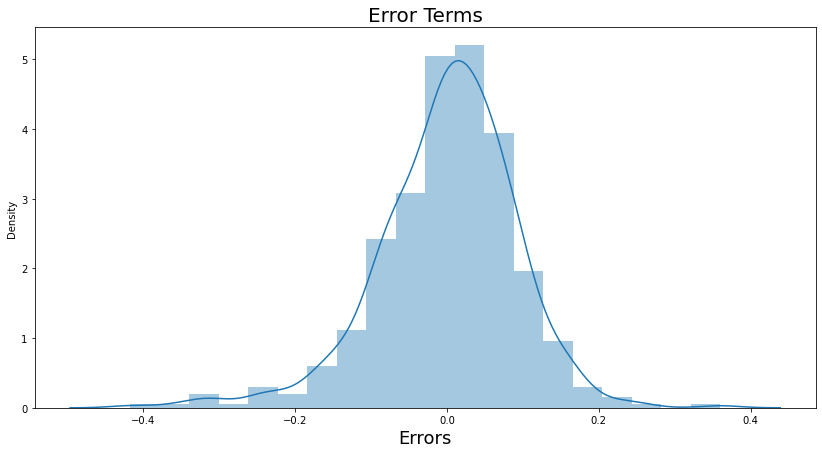

In [218]:
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     # X-label
plt.show()

#### We can see Error terms are normally distributed



## Making Predictions


Applying the scaling on the test sets


In [221]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed', 'atemp','count']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029


### Dividing into X_test and y_test


In [222]:
#Dividing into X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,atemp,humidity,windspeed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.255708,0.264840,0.232877,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.437258,0.442259,0.423633,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474


In [223]:
#Columns
X_train_new5.columns

Index(['Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer', 'winter',
       'Year', 'holiday', 'temp', 'windspeed'],
      dtype='object')

In [224]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,temp,windspeed
184,1.0,0,0,1,0,0,0,0,1,0.831783,0.084219
535,1.0,0,0,0,0,1,0,1,0,0.901354,0.153728
299,1.0,0,0,1,0,0,1,0,0,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0.881625,0.339570
152,1.0,0,0,0,0,1,0,0,0,0.817246,0.537414


In [225]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

### Finding R-squared and Adjusted R-Squared for Test set


In [228]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8035441330582012

In [229]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


#### Final Result Comparison between Train model and Test model:

- Testset R^2: 0.80 


- Testset Adj_R^2:  0.79


- Trainset R^2:  0.833


- Trainset  Adj^2: 0.830



### Model Evaluation


Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

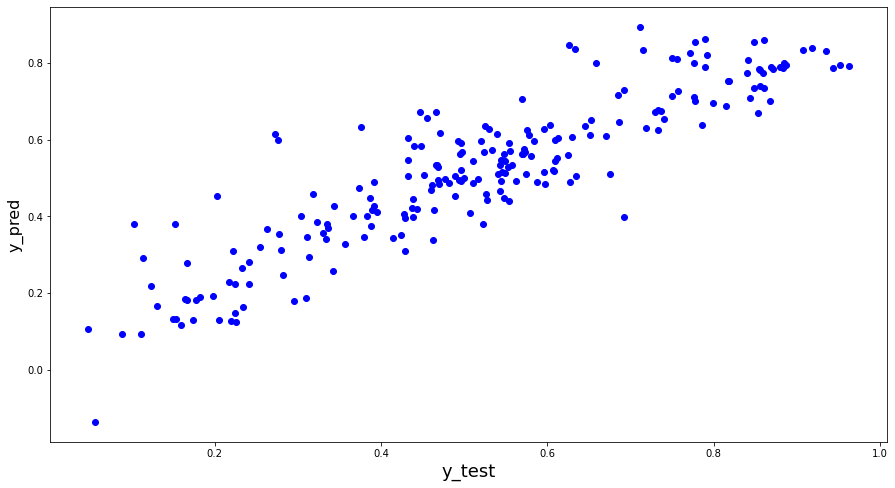

In [230]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

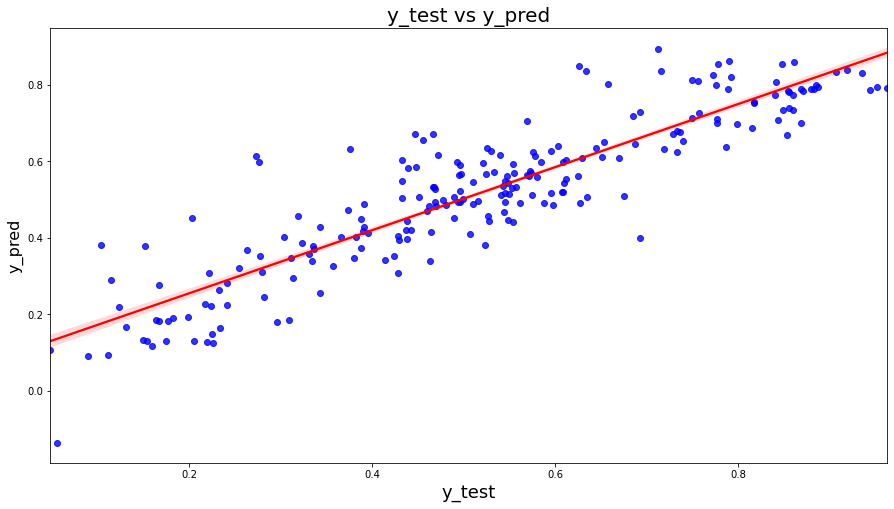

In [231]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### Homoscedasticity

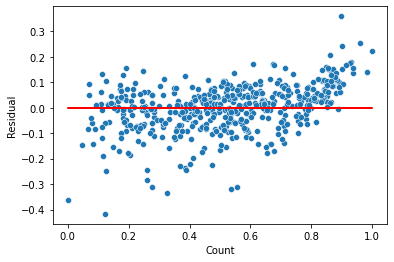

In [235]:
y_train_pred = lm5.predict(X_train_lm5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

##### There is no visible pattern in residual values, thus homoscedacity is well preserved

In [238]:
# importing librey
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [244]:
# checking mean squared error
RMSE = round(2*(mean_squared_error(y_test, y_pred)),5)
RMSE

0.01866

In [242]:
# checking mean absolute error
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0732

The Root Mean Squared Error value for the test dataset based on final model is 0.01866 and Mean Absolute Error is 0.0732, which indicates that the model is really good.

### Summary:

As per the final model, the top 3 predictor variables that influences bike booking are:

Temperature (Temp) A coefficient value of ‘0.478177’ indicated that a temperature has significant impact on bike rentals

Light Rain & Snow (weathersit =3) A coefficient value of ‘-0.286002’ indicated that the light snow and rain deters people from renting out bikes

Year (yr) A coefficient value of ‘0.234060’ indicated that a year wise the rental numbers are increasing

It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking. As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.